In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data.worldometers.csv',index_col=0)

In [3]:
data.head()

,infected
date,
2020-01-23,845
2020-01-24,1317
2020-01-25,2015
2020-01-26,2800
2020-01-27,4581


In [4]:
data.tail()

,infected
date,
2020-03-10,118948
2020-03-11,126214
2020-03-12,134576
2020-03-13,145483
2020-03-14,156621


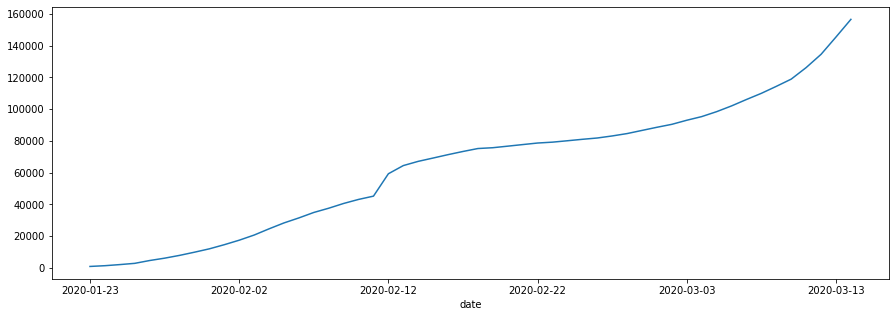

In [5]:
data.infected.plot(figsize=(15, 5))

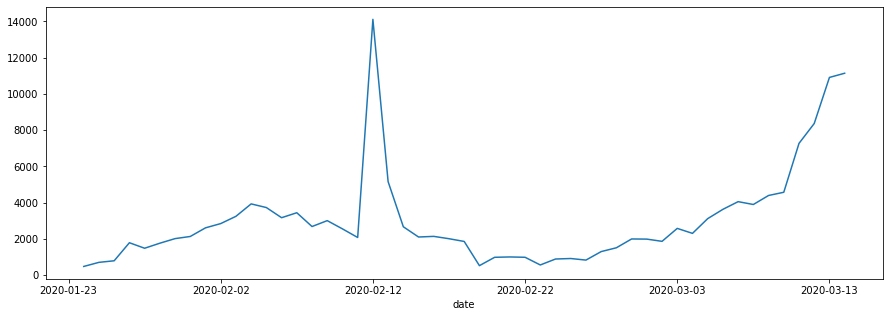

In [6]:
(data.infected - data.infected.shift(1)).plot(figsize=(15, 5))

In [7]:
from pyramid.arima import auto_arima

In [8]:
stepwise_model = auto_arima(data,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=916.177, BIC=927.649, Fit time=4.484 seconds
Fit ARIMA: order=(0, 2, 0); AIC=917.766, BIC=921.590, Fit time=0.054 seconds
Fit ARIMA: order=(1, 2, 0); AIC=913.784, BIC=919.520, Fit time=0.137 seconds
Fit ARIMA: order=(0, 2, 1); AIC=911.197, BIC=916.933, Fit time=0.495 seconds
Fit ARIMA: order=(1, 2, 1); AIC=912.996, BIC=920.644, Fit time=0.846 seconds
Fit ARIMA: order=(0, 2, 2); AIC=912.963, BIC=920.611, Fit time=1.068 seconds
Fit ARIMA: order=(1, 2, 2); AIC=914.927, BIC=924.487, Fit time=1.628 seconds
Total fit time: 8.805 seconds


In [9]:
stepwise_model.aic()

911.197187688311

In [10]:
stepwise_model.fit(data)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 2, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [11]:
predicted_days = 15
firstPredictionDay = datetime.datetime.strptime(data.index[-1], '%Y-%m-%d') + datetime.timedelta(days = 1)

In [12]:
future_forecast = stepwise_model.predict(n_periods=predicted_days)

In [13]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(future_forecast[x])))

2020-03-15 - 167223
2020-03-16 - 178023
2020-03-17 - 189020
2020-03-18 - 200215
2020-03-19 - 211608
2020-03-20 - 223198
2020-03-21 - 234986
2020-03-22 - 246972
2020-03-23 - 259155
2020-03-24 - 271535
2020-03-25 - 284114
2020-03-26 - 296890
2020-03-27 - 309863
2020-03-28 - 323034
2020-03-29 - 336403
